# Exploring your data

EDA stands for *Exploratory Data Analysis*. It is an important step of any project that will give you an idea of the contents of your dataset so that that you can decide on what method to use to extract the relevant information. There are two parts in EDA: first you have to verify the content and formatting of your data and second you need to visualize it to get some insight into relations between variables and their distributions.

## Dataset

Of course the first task is to import the dataset or access it. In this course we always import simple csv files or have a folder full with images that we can import. However in most professional cases, the dataset is embedded in a database and you might need to do some work to get access to the data.

To illustrate the first steps of EDA we import here a small "made-up" dataset that make it easy to understand potential problems. It just contains some information about classical composers:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

# Silence specific warnings
pd.set_option('future.no_silent_downcasting', True)

In [2]:
composers = pd.read_excel("../../datasets/composers.xlsx", sheet_name=1)
composers

,composer,birth,death,city
0,Mahler,1860.0,1911,Kaliste
1,Beethoven,1770.0,1827,Bonn
2,Puccini,1858.0,1924,Lucques
3,Shostakovich,1906.0,1975,Saint-Petersburg
4,Sibelius,10.0,unknown,unknown
5,Haydn,NaN,NaN,Röhrau


## Checking the data

The first thing we have to check is the type of data we have in the table. We can easily do this with the ```dtypes``` parameter:

In [3]:
composers.dtypes

composer     object
birth       float64
death        object
city         object
dtype: object

We see that the death column is an *object* column, which means non-numerical or text. However it should really be a number! The problem is that some values are missing, and Pandas doesn't know what to do with those. The birth column also has a missing value, but it is recognized as *Not a Number* and Pandas can deal with it. The death column in contrast has a text value ```unknown```. How can we fix this? We can for example ```replace``` some values:

In [4]:
composers.death.replace('unknown', np.nan)

0    1911
1    1827
2    1924
3    1975
4     NaN
5     NaN
Name: death, dtype: object

Of course we actually need to assign these new column to our dataframe:

In [5]:
composers.death = composers.death.replace('unknown', np.nan)
composers

,composer,birth,death,city
0,Mahler,1860.0,1911,Kaliste
1,Beethoven,1770.0,1827,Bonn
2,Puccini,1858.0,1924,Lucques
3,Shostakovich,1906.0,1975,Saint-Petersburg
4,Sibelius,10.0,NaN,unknown
5,Haydn,NaN,NaN,Röhrau


In [6]:
composers.dtypes

composer     object
birth       float64
death        object
city         object
dtype: object

We can see that the column is still of type `object`. We can map both the birth and the death column to integers, which in this case is better than float because it will save some space and we are only interested in discrete years. However, we cannot just use the normal `int` python datatype because it does not support NaNs. We could either go back to using a float, or we use a Pandas datatype such as the [16-bit Nullable Interger](https://pandas.pydata.org/docs/reference/api/pandas.Int16Dtype.html):

In [7]:
composers.birth = composers.birth.astype(pd.Int16Dtype())
composers.death = composers.death.astype(pd.Int16Dtype())

composers

,composer,birth,death,city
0,Mahler,1860,1911,Kaliste
1,Beethoven,1770,1827,Bonn
2,Puccini,1858,1924,Lucques
3,Shostakovich,1906,1975,Saint-Petersburg
4,Sibelius,10,<NA>,unknown
5,Haydn,<NA>,<NA>,Röhrau


In [8]:
composers.dtypes

composer    object
birth        Int16
death        Int16
city        object
dtype: object

Now we preserved the NaN (or <NA>) values. Do we actually need them? In some cases we can just leave them and they are just discarded. For example we can ask Pandas to compute the mean of the columns and it just discards those values.

In [9]:
composers.mean(numeric_only=True)

birth     1480.8
death    1909.25
dtype: Float64

If there are only a few values and we made sure they are not "important" (e.g. they do not represent a very specific class of data), we can just discard them. Again, we can use Pandas for this:

In [10]:
composers = composers.dropna()
composers

,composer,birth,death,city
0,Mahler,1860,1911,Kaliste
1,Beethoven,1770,1827,Bonn
2,Puccini,1858,1924,Lucques
3,Shostakovich,1906,1975,Saint-Petersburg


## Visualize relations between data

To understand relationships between features as well as their distributions we can could plot histograms and scatter plots for all of them. Instead of doing this manually, we can use a very useful Seaborn function called pair-plot. To get interesting plots we now turn back to our wine dataset:

In [11]:
wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


We use ```sns.pairplot``` only on a few columns of the dataset so that we can better see the plots:

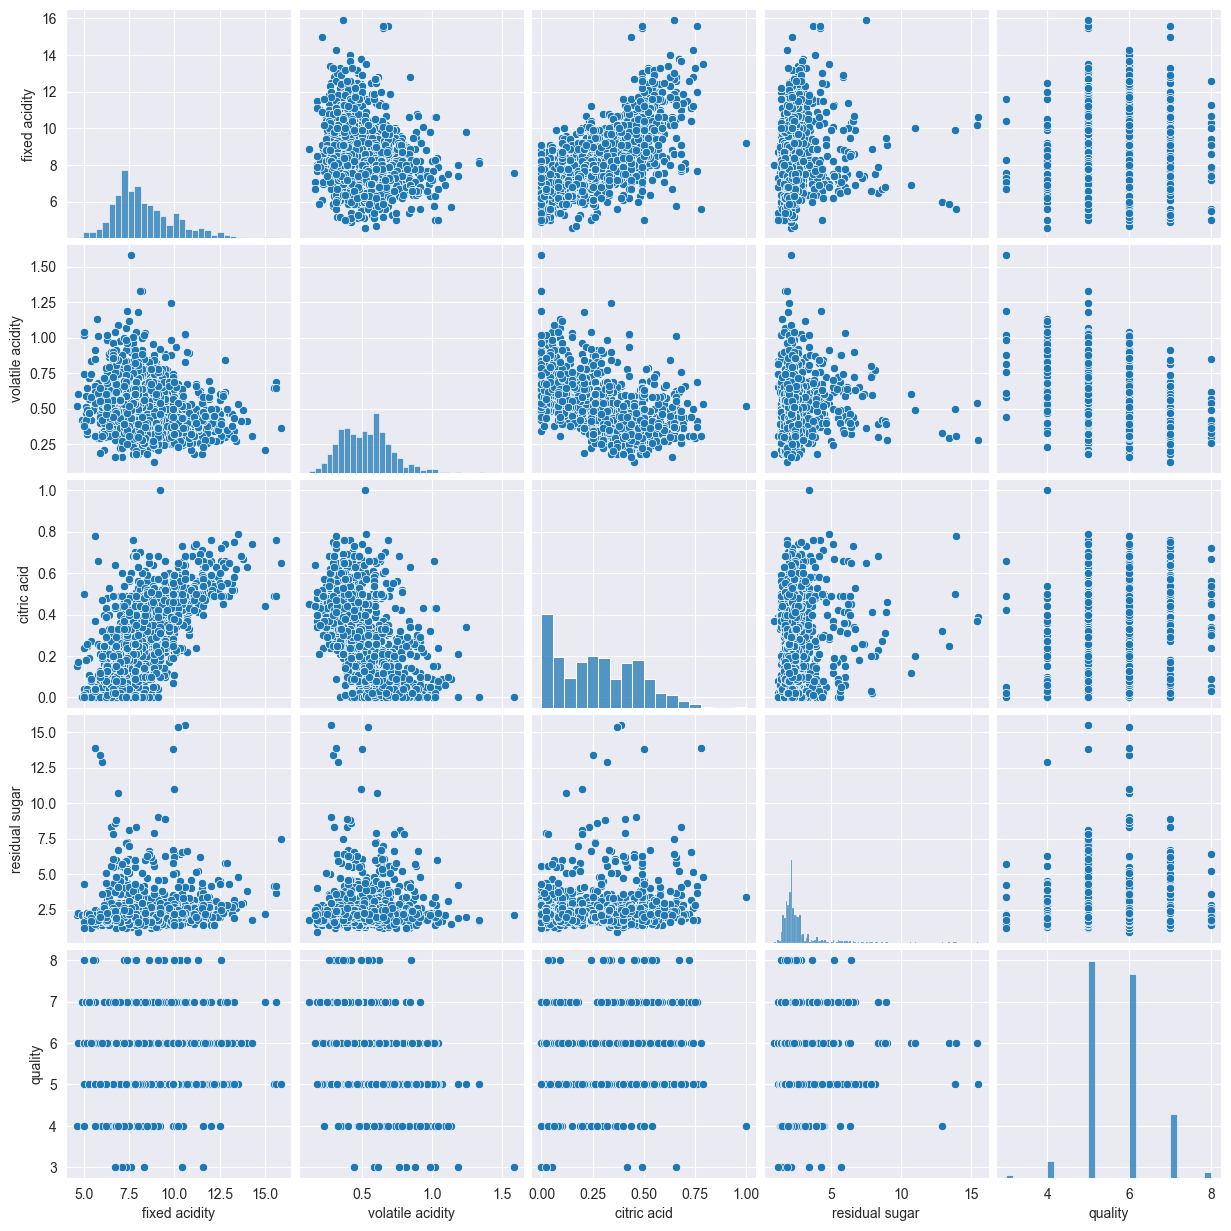

In [12]:
sns.set_style("darkgrid")
sns.pairplot(wine.iloc[:,[0, 1, 2, 3, -1]]);

As you can see this provides us on the diagonal a histogram for each feature in the DataFrame and at other positions a scatter plot for all possible pairs of variables. This type of plot can give us visually already a lot of information. For example:

- The pairplot displays histograms along the diagonal, showing the distribution of each feature individually, while the off-diagonal plots are scatter plots that visualize relationships between every pair of features. This type of visualization helps us quickly identify patterns and potential issues in the dataset.
- Fixed acidity and citric acid appear to be highly correlated. Since they provide similar information, we might consider removing one to simplify the dataset without losing much predictive power.
- The histogram of residual sugar is right-skewed, with most values concentrated at lower levels and a long tail extending to the right. This suggests the presence of outliers—likely sweet wines—which could distort our analysis if not handled properly.
- Residual sugar outliers influence multiple relationships in the dataset. For example, when examining how sugar relates to fixed acidity, those extreme values could disproportionately affect correlation estimates. This is something we should account for in modeling.
- Citric acid has a disproportionately large number of very low (or zero) values. This suggests that many wines in the dataset contain little or no citric acid. Such a sharp cutoff might indicate a data collection artifact or a categorical effect, which could introduce bias in our models.
- The quality feature is highly imbalanced. Most wines are rated 5 or 6, while there are relatively few with ratings of 4 or 7. This imbalance is important to consider when building a predictive model, as a naïve classifier that always predicts 5 or 6 would achieve high accuracy but fail to provide meaningful predictions.

## Next steps

As next step, we might want to correct for some of the above observations (e.g. remove outliers). We will see practical example later on when we try to use ML methods. 

## Exercise

1. Import the dataset `kc_house_data.csv` from the dataset directory. It is a dataset about the price of houses in California with information such as number bedrooms, surface etc..

2. Use the ```pairplot``` function to looks at relations between variables. Use only the columns 1 to 8 to avoid having too many plots (ignore the first column which is only an index).

3. What do you observe in the relation between the variables ```price``` vs ```sqft_living```? Do you think you can predict the price with the ```sqft_living``` variable?

4. The bedroom distribution (on the diagonal) is strange. Make a single histogram (```sns.histplot```) with just this variable. Does the plot look ok? If not what can you try to adjust and why?

5. Do we have the same number of houses with all number of bedrooms? If not, how could this be a problem in the frame of Machine Learning?

In [13]:
df = pd.read_csv("../../datasets/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


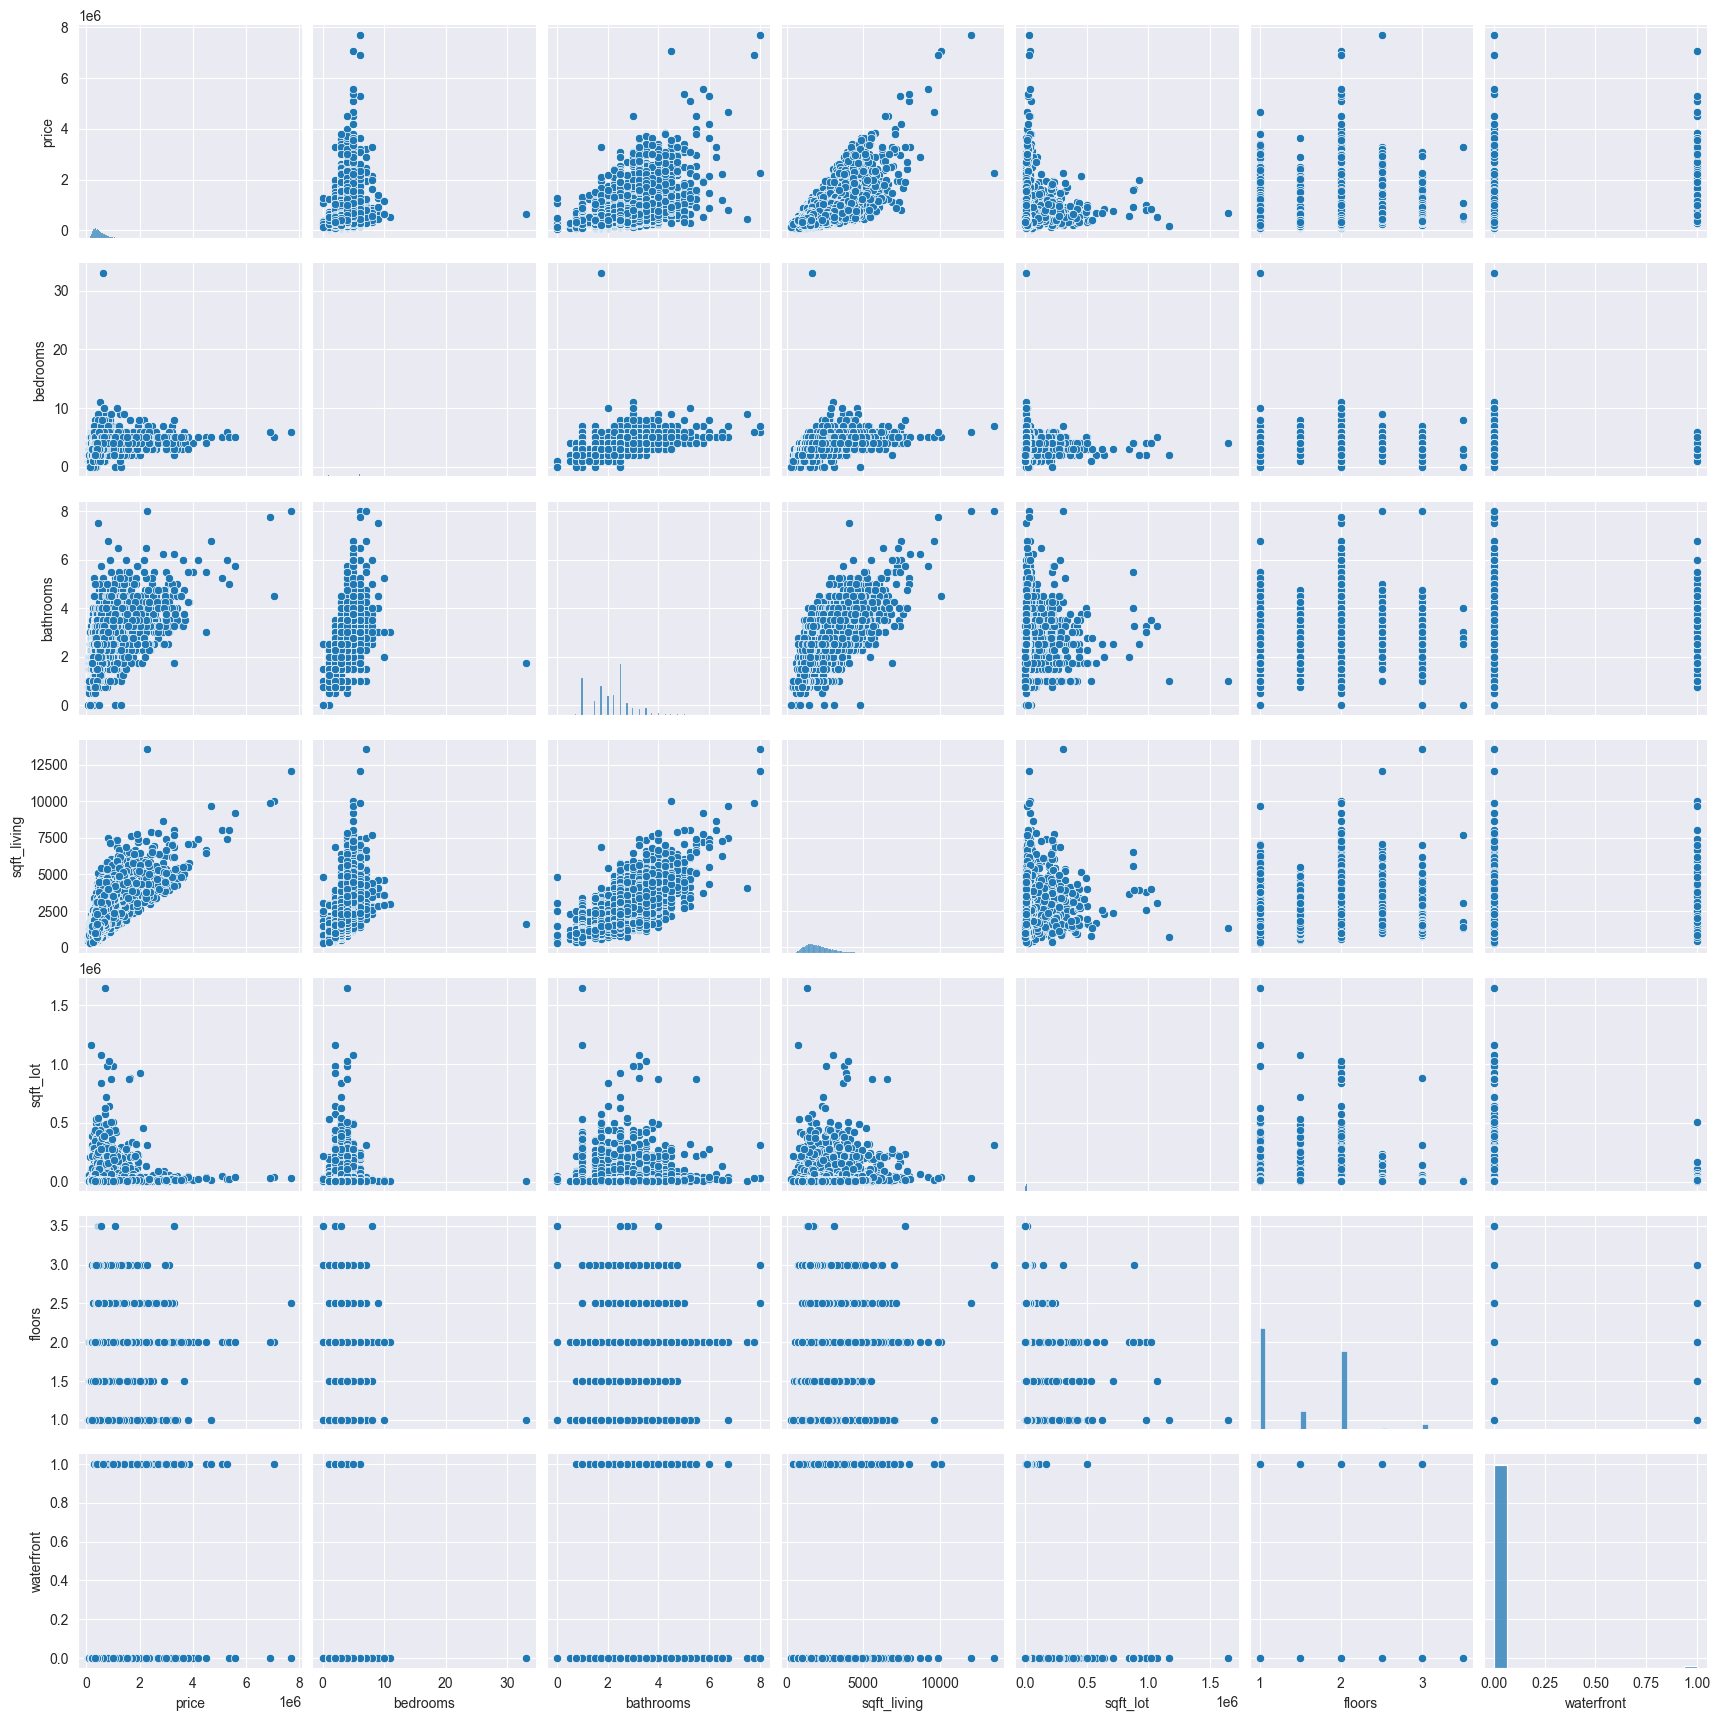

In [24]:
# sns.pairplot(df.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8]]);
sns.pairplot(df.iloc[:, list(range(1,9))]);

It is easy to see and also intuitive that houses with higher `sqft_living` values have higher prices. Therefore, `sqft_living` is likely a good predictor. We also see that for lower values of `sqft_living`, it is easier to predict a price, but when we go towards higher values (until roughly 7500), the `sqft_living` variable cannot explain all of the variance anymore. We know that the price usually is higher for more space, but we need more information about the house to get a better prediction. Moreover, we do not have many samples with `sqft_living` values that are higher than 7500. For those samples with higher values that we see in the plot, the `sqft_living` seems to be a good predictor of the price, but we have to be cautious with these assumptions because these samples might not be representative due to the small sample size.

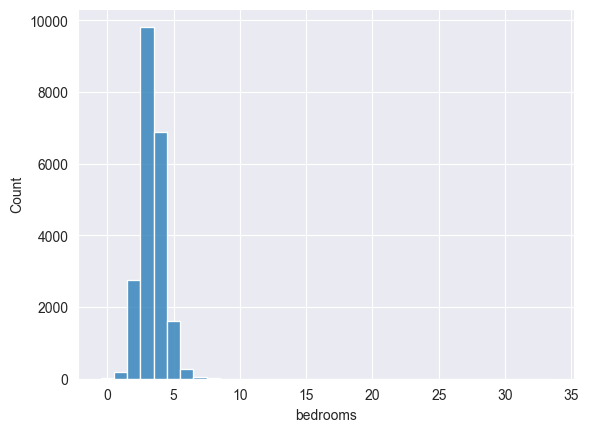

In [26]:
sns.histplot(df, x="bedrooms", discrete=True);

There are many outliers with a lot of bedrooms. If we wanted to use linear regression to model the price of houses, then that would be a problem because these extreme values distort the mathematical equation found by linear regression. If we are okay with not being able to predict the price accurately for houses with more than 8 bedrooms, then we can just remove these outliers. Below you see how such an adjusted distribution of bedrooms might look like.

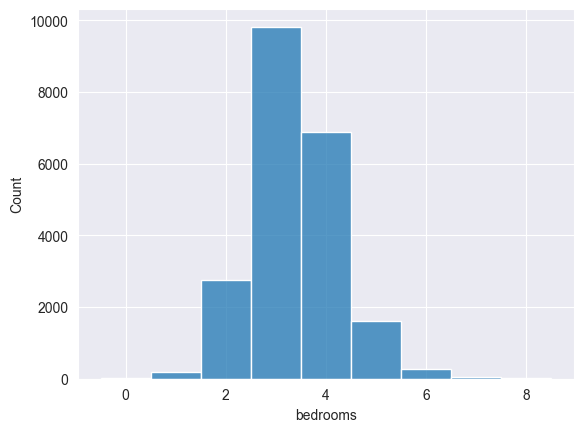

In [27]:
sns.histplot(df[df.bedrooms <= 8], x="bedrooms", discrete=True);

You can also use the `value_counts` function on the bedrooms column to see the exact number of samples with a certain number of bedrooms:

In [21]:
bedrooms = df.value_counts("bedrooms")
bedrooms

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

We see that the number of bedrooms per house is highly imbalanced. There are a lot of houses with three or four bedrooms, some with two or five bedrooms and very little houses with other numbers of bedrooms. If we fit a model on this data, then we might get better results on those test samples that have three or four bedrooms. To prevent this, we could use either of those approaches:

1. **Subsampling**: We only take as much samples per *category* as in the category with the smallest number of samples. For example, if we were to use all of the data, then we would say that the smallest number of houses per category is 1, therefore we would only consider one sample also from the category of houses with three bedrooms. This makes no sense in this case, as we would *throw away* too much data.
2. **Oversampling**: We look at the category with the largest number of samples (three bedrooms) and then we take that many samples from every category. If all of the samples are exhausted, we just re-use sample that the models has already seen before. There are also more sophisticated techniques that can be used like [SMOTE](https://www.turing.com/kb/smote-for-an-imbalanced-dataset).
3. **Weighted updates**: When updating the parameters of the model, we make smaller updates when the sample belongs to a over-represented category (such as houses with three or four bedrooms), and we make larger updates if it is a sample of an under-represented category.